In [1]:
data = [
    {'price':50000,'rooms':3,'neighborhood':'Queen Avenue'},
    {'price':60000,'rooms':2,'neighborhood':'Fremont'},
    {'price':70000,'rooms':3,'neighborhood':'Wallington'},
    {'price':55000,'rooms':4,'neighborhood':'Queen Avenue'}
]

from sklearn.feature_extraction import DictVectorizer
vec = DictVectorizer(sparse=False, dtype=int)
vec.fit_transform(data)

array([[    0,     1,     0, 50000,     3],
       [    1,     0,     0, 60000,     2],
       [    0,     0,     1, 70000,     3],
       [    0,     1,     0, 55000,     4]])

In [2]:
vec.get_feature_names()

C:\Users\Gabor\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['neighborhood=Fremont',
 'neighborhood=Queen Avenue',
 'neighborhood=Wallington',
 'price',
 'rooms']

In [3]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

sample = ["problem of evil", "evil queen", "orizon problem"]
vec = CountVectorizer()
x = vec.fit_transform(sample)
x.toarray()

array([[1, 1, 0, 1, 0],
       [1, 0, 0, 0, 1],
       [0, 0, 1, 1, 0]], dtype=int64)

In [4]:
import pandas as pd
pd.DataFrame(x.toarray(),columns=vec.get_feature_names())

,evil,of,orizon,problem,queen
0,1,1,0,1,0
1,1,0,0,0,1
2,0,0,1,1,0


In [5]:
vec = TfidfVectorizer()
x = vec.fit_transform(sample)
pd.DataFrame(x.toarray(),columns=vec.get_feature_names())

C:\Users\Gabor\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,evil,of,orizon,problem,queen
0,0.517856,0.680919,0.000000,0.517856,0.000000
1,0.605349,0.000000,0.000000,0.000000,0.795961
2,0.000000,0.000000,0.795961,0.605349,0.000000


In [27]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

In [28]:
from sklearn.datasets import make_blobs
x,y = make_blobs(100, 2, centers=2, random_state=2, cluster_std=1.5)

print(x[:5])
print(y[:5])

[[ 0.92141506 -9.98499137]
 [-5.26927614 -9.6186543 ]
 [-0.45292089 -6.04316334]
 [-0.0856312  -2.16867404]
 [ 1.53194956 -0.36022153]]
[0 0 0 1 1]


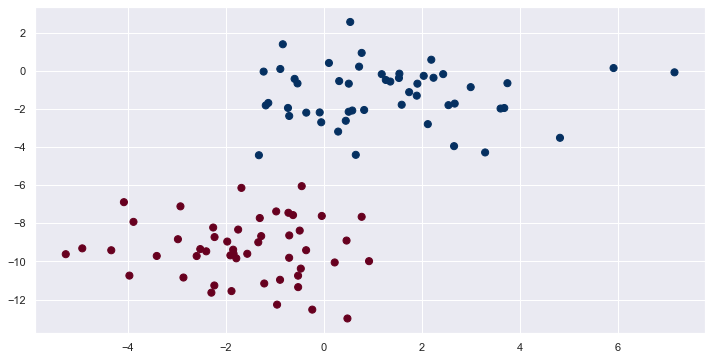

In [29]:
plt.figure(figsize=(12,6))
plt.scatter(x[:,0],x[:,1], c=y, s=50, cmap='RdBu')

In [9]:
from sklearn.naive_bayes import GaussianNB
model=GaussianNB()
model.fit(x,y)

GaussianNB()

In [10]:
rng = np.random.RandomState(0)
xnew = [14,18]*rng.rand(2000,2) + [-6,-14]

xnew[:5]

array([[ 1.68338905, -1.12659141],
       [ 2.43868727, -4.19210271],
       [-0.06883281, -2.37390596],
       [ 0.12622096,  2.05191401],
       [ 7.49127865, -7.09805266]])

(-5.890554373486014,
 7.777566725032841,
 -13.775943665162341,
 3.3634536696825847)

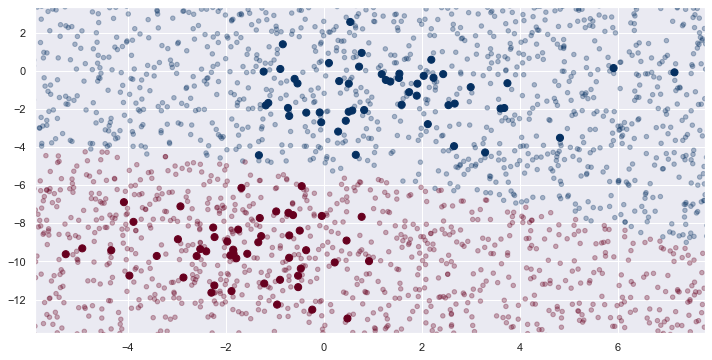

In [11]:
ynew = model.predict(xnew)
plt.figure(figsize=(12,6))
plt.scatter(x[:,0],x[:,1], c=y, s=50, cmap='RdBu')
lim = plt.axis()
plt.scatter(xnew[:,0],xnew[:,1], c=ynew, s=20, cmap='RdBu', alpha=0.3)
plt.axis(lim)


In [12]:
from sklearn.datasets import fetch_20newsgroups
data = fetch_20newsgroups()
data.target_names

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

In [13]:
category = ['talk.religion.misc', 'soc.religion.christian', 'comp.graphics','sci.space']
train = fetch_20newsgroups(subset='train', categories=category)
test = fetch_20newsgroups(subset='test', categories=category)


In [14]:
print(train.data[5])

From: dmcgee@uluhe.soest.hawaii.edu (Don McGee)
Subject: Federal Hearing
Originator: dmcgee@uluhe
Organization: School of Ocean and Earth Science and Technology
Distribution: usa
Lines: 10


Fact or rumor....?  Madalyn Murray O'Hare an atheist who eliminated the
use of the bible reading and prayer in public schools 15 years ago is now
going to appear before the FCC with a petition to stop the reading of the
Gospel on the airways of America.  And she is also campaigning to remove
Christmas programs, songs, etc from the public schools.  If it is true
then mail to Federal Communications Commission 1919 H Street Washington DC
20054 expressing your opposition to her request.  Reference Petition number

2493.



In [15]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline

model = make_pipeline(TfidfVectorizer(), MultinomialNB())

In [16]:
model.fit(train.data, train.target)
labels = model.predict(test.data)

Text(256.173125, 0.5, 'predicted label')

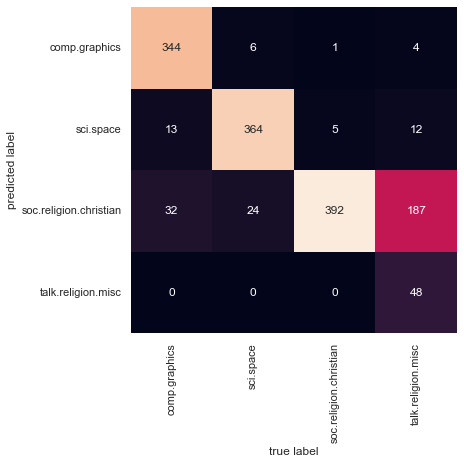

In [17]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(test.target, labels)
plt.figure(figsize=(12,6))
sns.heatmap(mat.T, square=True, annot=True, cbar=False, fmt='d', xticklabels=train.target_names,
           yticklabels=train.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label')

In [18]:
def predict_cat(s):
    pred = model.predict([s])
    return train.target_names[pred[0]]

In [19]:
print(predict_cat("sending payload to ISS"))
print(predict_cat("screen resolution"))

sci.space
comp.graphics


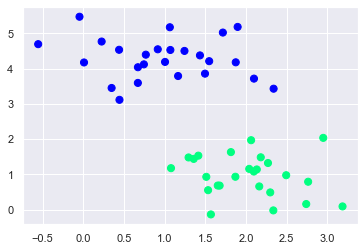

In [31]:
x,y = make_blobs(n_samples=50, centers=2, random_state=0, cluster_std=0.6)
plt.scatter(x[:,0],x[:,1], c=y, s=50, cmap="winter")

In [21]:
from sklearn.svm import SVC

model = SVC(kernel='linear')
model.fit(x,y)

SVC(kernel='linear')

In [22]:
def plot_svc_decision_function(model):
    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    x = np.linspace(xlim[0],xlim[1], 30)
    y = np.linspace(ylim[0],ylim[1], 30)
    Y,X = np.meshgrid(y,x)
    xy = np.vstack([X.ravel(),Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    
    ax.contour(X,Y,P, colors='k', levels=[-1,0,1], alpha=0.5, linestyles=['--','-','--'])
    ax.scatter(model.support_vectors_[:,0],model.support_vectors_[:,1],
              s=300, linewidth=3, facecolor='none', edgecolors='b')
    
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

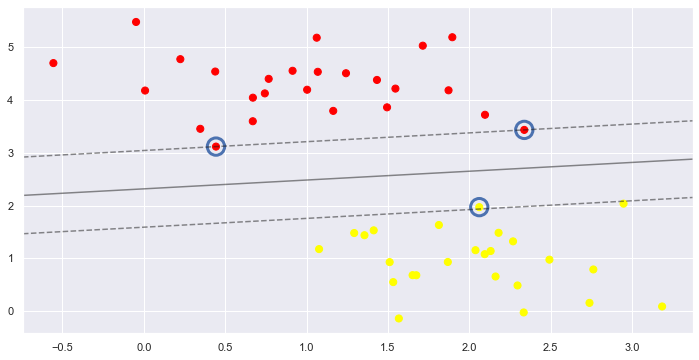

In [23]:
plt.figure(figsize=(12,6))
plt.scatter(x[:,0],x[:,1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(model)

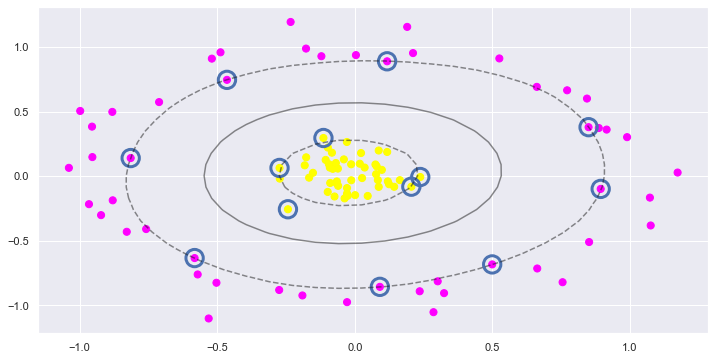

In [24]:
from sklearn.datasets import make_circles
x,y = make_circles(100, factor=.1, noise=.1)
clf=SVC(kernel='rbf').fit(x,y)

plt.figure(figsize=(12,6))
plt.scatter(x[:,0],x[:,1],c=y, s=50, cmap='spring')
plot_svc_decision_function(clf)